# Title
## Subtitle

### Intro Title
Introduction Text

In [17]:
# Import Packages
import pandas as pd
import pandasql as ps
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm
import openpyxl

In [18]:
def show_distribution(var_data, x_label,plot_title):

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel(x_label)

    # Add a title to the Figure
    fig.suptitle(plot_title)

    # Show the figure
    plt.show()

def show_regression(df, x_var, y_var):
    df_regression = df[[x_var,y_var]].copy()

    # Get the regression slope and intercept
    m, b, r, p, se = stats.linregress(df_regression[x_var], df_regression[y_var])
    print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m, b))
    print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m, b))

    # Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
    df_regression['fx'] = (m * df_regression[x_var]) + b

    # Calculate the error between f(x) and the actual y (Grade) value
    df_regression['error'] = df_regression['fx'] - df_regression[y_var]

    # Create a scatter plot of Grade vs StudyHours
    df_regression.plot.scatter(x=x_var, y=y_var)

    # Plot the regression line
    plt.plot(df_regression[x_var], df_regression['fx'], color='cyan')

    # Display the plot
    plt.show()

In [35]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 240)
pd.set_option('display.max_rows', None)

sales_df = pd.read_excel("Project 1/Sales_data.xlsx")
customer_df = pd.read_excel("Project 1/Customer_data.xlsx")

print(sales_df.tail())
print(customer_df.tail())

      Transaction_ID Transaction_Date  Customer_ID       Price  Quantity      Amount
4995            4996       2025-04-12           20   35.583333         8  284.666667
4996            4997       2025-04-12          402   66.222222         9  596.000000
4997            4998       2025-04-12           81  696.666667         1  696.666667
4998            4999       2025-04-12          373   46.866667        10  468.666667
4999            5000       2025-04-12          368  199.500000         1  199.500000
     Customer_ID  Age         Income
495          496   33  397667.500000
496          497   67  398920.833333
497          498   30  400344.166667
498          499   56  402169.166667
499          500   69  410441.000000


In [37]:
# EXPLORATION -
# Join Data
join_query = "SELECT s.*, c.Age, c.Income FROM sales_df s JOIN customer_df c on s.Customer_ID = c.Customer_ID"
full_data = ps.sqldf(join_query, locals())

print(full_data.tail())

      Transaction_ID            Transaction_Date  Customer_ID       Price  Quantity      Amount  Age         Income
4995            4996  2025-04-12 00:00:00.000000           20   35.583333         8  284.666667   21   79030.111111
4996            4997  2025-04-12 00:00:00.000000          402   66.222222         9  596.000000   72  271198.666667
4997            4998  2025-04-12 00:00:00.000000           81  696.666667         1  696.666667   66  120430.000000
4998            4999  2025-04-12 00:00:00.000000          373   46.866667        10  468.666667   37  257528.222222
4999            5000  2025-04-12 00:00:00.000000          368  199.500000         1  199.500000   21  255631.777778


Minimum:54.00
Mean:401.94
Median:358.89
Mode:175.00
Maximum:1033.33



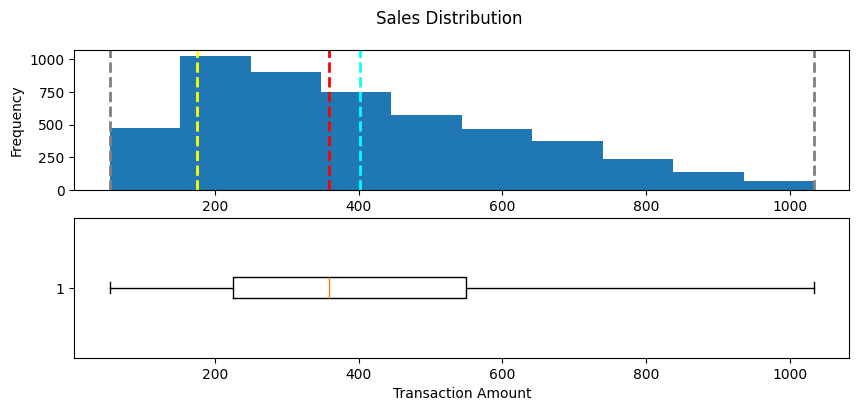

In [38]:
# Visual - Distribution of Sales
txnAmt_data = full_data['Amount']
show_distribution(txnAmt_data,'Transaction Amount','Sales Distribution')

Minimum:18.00
Mean:48.03
Median:50.00
Mode:37.00
Maximum:75.00



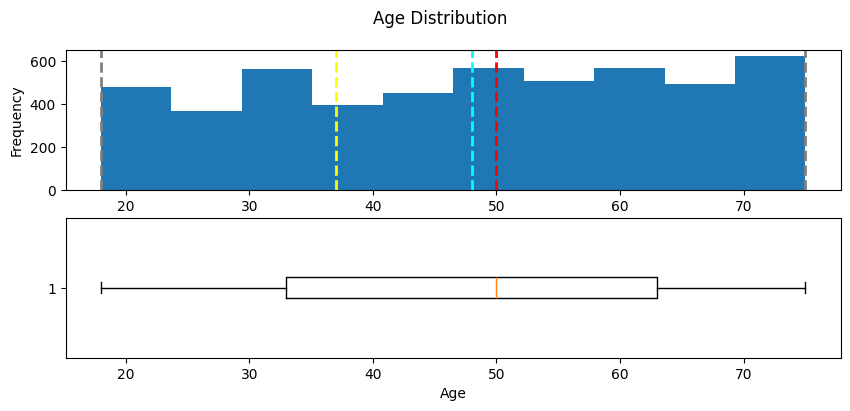

In [41]:
# Visual - Distribution of Age
age_data = full_data['Age']
show_distribution(age_data,'Age','Age Distribution')

Minimum:53158.83
Mean:201889.43
Median:193329.78
Mode:152026.39
Maximum:410441.00



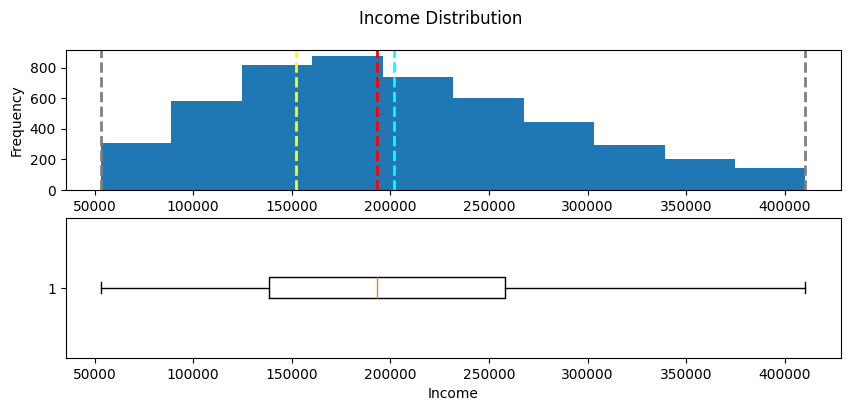

In [40]:
# Visual - Distribution of Income
income_data = full_data['Income']
show_distribution(income_data,'Income','Income Distribution')

slope: 8.2830
y-intercept: 4.1240
so...
 f(x) = 8.2830x + 4.1240


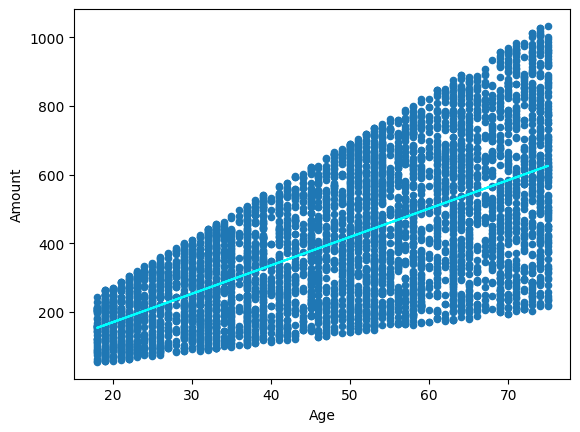

In [42]:
# Visual - Scatter Plot of Sales/Age
show_regression(full_data,'Age','Amount')

slope: -0.0000
y-intercept: 402.3370
so...
 f(x) = -0.0000x + 402.3370


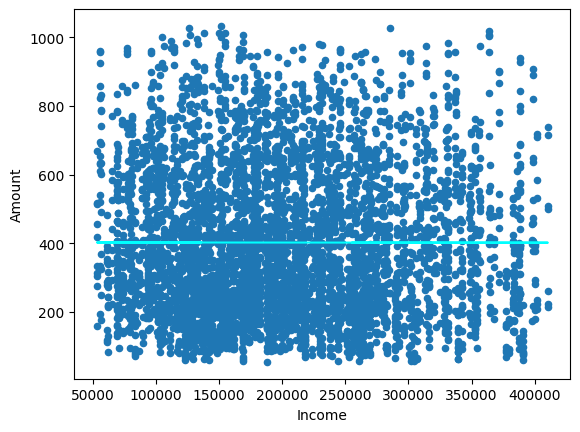

In [43]:
# Visual - Scatter Plot of Sales/Income
show_regression(full_data,'Income','Amount')

In [44]:
# ANALYSIS

# Correlations
# Correlation Matrix Amount/Age/Income
correlation_matrix = full_data[['Amount','Age','Income']].corr()
print(correlation_matrix)

          Amount       Age    Income
Amount  1.000000  0.640107 -0.000728
Age     0.640107  1.000000 -0.010397
Income -0.000728 -0.010397  1.000000


In [45]:
# Correlation Age/Sales
correlation, p_value = pearsonr(full_data['Age'], full_data['Amount'])
print(f"Pearson correlation: {correlation}")
print(f"P-value: {p_value}")

Pearson correlation: 0.640107451901916
P-value: 0.0


In [46]:
# Correlation Income/Sales
correlation, p_value = pearsonr(full_data['Income'], full_data['Amount'])
print(f"Pearson correlation: {correlation}")
print(f"P-value: {p_value}")

Pearson correlation: -0.0007282629111018402
P-value: 0.9589405717064825


In [47]:
# Regression Model
salesByAge = full_data[['Amount','Age']]
X = salesByAge['Age']
y = salesByAge['Amount']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     3469.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:19:00   Log-Likelihood:                -32631.
No. Observations:                5000   AIC:                         6.527e+04
Df Residuals:                    4998   BIC:                         6.528e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1240      7.147      0.577      0.5

In [48]:
# Separate features and labels
X, y = full_data['Age'].values, full_data['Amount'].values
X = X.reshape(-1,1)

In [49]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 3500 rows
Test Set: 1500 rows


In [50]:
# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [51]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [220. 228. 534. 187. 427. 617. 419. 543. 270. 617.]
Actual labels   :  [171.88888889 306.         839.11111111 224.88888889 178.5
 990.77777778 438.88888889 682.5        369.77777778 731.77777778]


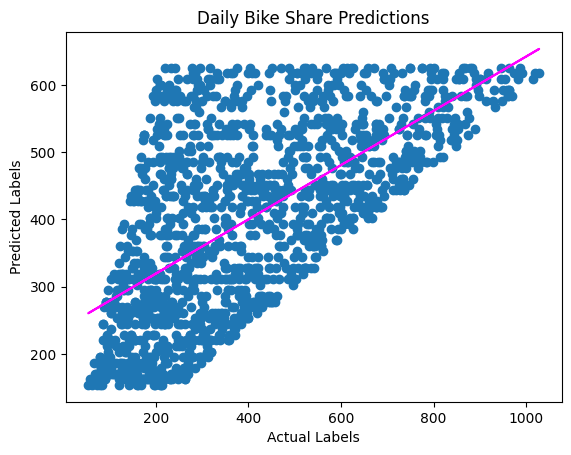

In [52]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [53]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 28386.305143541187
RMSE: 168.4823585528799
R2: 0.40610785318566045
